#Table of Contents


1.   [Data Cleaning](#Data-Cleaning)
2.   [Univariate Analysis](#Univariate-Analysis)
3.   [Bivariate/Multivariate Analysis](#Bivariate)
4.   [Analysing driver variables for loan defaulters](#drivervariables)
5.   [Conclusion](#conclusion)



#Data Cleaning <a class="anchor" id="Data-Cleaning"></a>

In [77]:
#loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm



loan_df=pd.read_csv('loan.csv',encoding = "palmos",low_memory=False)


#initial Configuration
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns


In [78]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [79]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,nan,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,

As there are too many columns for analysis, we will first try to reduce the number of columns so that only important columns are left for analysis

In [80]:
# find all the columns where the values are same for all rows
for c in loan_df.columns:
 if len(loan_df[c].value_counts())<2:
    print(c)

#remove these columns as it as no influence on our analysis
for c in loan_df.columns:
 if len(loan_df[c].value_counts())<2:
    loan_df=loan_df.drop(columns=[c])

loan_df.info()

pymnt_plan
initial_list_status
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tax_liens
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
<class

In [81]:
# now hecking columns with more than 90% if junk values and removing them 
for c in loan_df.columns:
  percent=(loan_df[c].isna().sum()/len(loan_df[c]))*100
  if percent>=90:
    print(c," total junk values ",percent," : ",loan_df[c].isna().sum())
    loan_df=loan_df.drop(columns=[c])

#print(loan_df.info())

mths_since_last_record  total junk values  92.98537150338646  :  36931
next_pymnt_d  total junk values  97.12969257496789  :  38577


In [82]:
rows,cols = loan_df.shape
len(loan_df.member_id.unique())==rows

True

In [83]:
#droping duplicate records
loan_df=loan_df.drop_duplicates()


#set id as unique id if it is unique
rows,cols = loan_df.shape

if (len(loan_df.id.unique())==rows):
  loan_df.set_index('id', inplace=True)

#removing unnecessary columns
loan_df=loan_df.drop(columns=[
                              'member_id',# We already have  unique ID so this one is no needed
                              'url',# The URL does not gives any use full insight for analysis
                              'zip_code',# This column cant be considered to decide if the loan should be approved or not                          
                              "emp_title" # This column wont give direct relation to a loan defaulter
                              ])

#loan_df.info()

In [84]:
# summarise number of missing values again
100*(loan_df.isnull().sum()/len(loan_df.index))

loan_amnt                  0.0000
funded_amnt                0.0000
funded_amnt_inv            0.0000
term                       0.0000
int_rate                   0.0000
installment                0.0000
grade                      0.0000
sub_grade                  0.0000
emp_length                 2.7066
home_ownership             0.0000
annual_inc                 0.0000
verification_status        0.0000
issue_d                    0.0000
loan_status                0.0000
desc                      32.5805
purpose                    0.0000
title                      0.0277
addr_state                 0.0000
dti                        0.0000
delinq_2yrs                0.0000
earliest_cr_line           0.0000
inq_last_6mths             0.0000
mths_since_last_delinq    64.6625
open_acc                   0.0000
pub_rec                    0.0000
revol_bal                  0.0000
revol_util                 0.1259
total_acc                  0.0000
out_prncp                  0.0000
out_prncp_inv 

As you can see the columns desc and mths_since_last_delinq has lot of null values. <br>
**desc** (Description) contains the comment the applicant had written while applying for the loan. While one can use this data to do sentiment analaysis but we dont have scope for that in our prresent scenario<br>
**mths_since_last_delinq** contains number months passed since the person last fell into the 90 DPD group.There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.

In [85]:
#rmoving those column
loan_df= loan_df.drop(columns=['desc','mths_since_last_delinq'])

# checking whether some rows have more than 3 missing values
len(loan_df[loan_df.isnull().sum(axis=1) > 3].index)

0

In [86]:
# now the data is enough sorted so that other types of cleaning can be done

#converting percentage into float for interset rate
fix=lambda x: float(x[:-1])
loan_df.int_rate=loan_df.int_rate.apply(fix)

#checking data type of columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose         

In [87]:
#Employment Term : Remove 'n/a' value with '0'.

print(loan_df.emp_length.unique())
loan_df.emp_length.fillna('0',inplace=True)
print(loan_df.emp_length.unique())
loan_df.emp_length.value_counts()

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
0            1075
Name: emp_length, dtype: int64

In [88]:
#Cast all object variables to numeric
numeric_columns = ['funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan_df[numeric_columns] = loan_df[numeric_columns].apply(pd.to_numeric)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               39717 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose         

In [89]:
loan_df.to_csv('./test.csv')

In [90]:


#Cast all object variables to DATE
date_columns = ['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']
loan_df[date_columns] = loan_df[date_columns].apply(lambda x:pd.to_datetime('01-'+x,format='%d-%b-%y'))

#alternate method
# import calendar
# import datetime
# a={v: k for k,v in enumerate(calendar.month_abbr)}
# fix=lambda x: pd.to_datetime(datetime.datetime(int('20'+x.split('-')[1]), a[x.split('-')[0]], 1),format='%d-%b-%y')
# fix=lambda x: pd.to_datetime('01-'+x,format='%d-%b-%y')


loan_df.dtypes

loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                             int64
revol_bal                         

# Univariate Analysis <a class="anchor" id="Univariate-Analysis"></a>

As now the data is cleaned enough so we can begin with analysis 

## Numeric/Continues Analysis

### Analysing Verification Status

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64


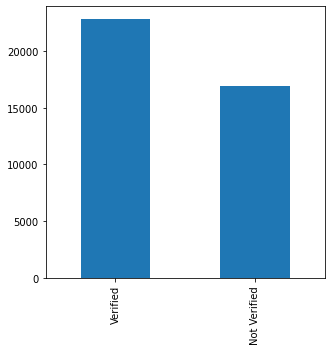

In [91]:
print(loan_df.verification_status.value_counts())

#after checking the column in dictionary it seems like the value Verified and Source Verified has the same meaning 
#hence replacing the value Source Verified with Verified
loan_df["verification_status"] = loan_df["verification_status"].replace("Source Verified","Verified")



loan_df.verification_status.value_counts().plot.bar(figsize=(5,5))

**Insight:** Most of the accepted loan applicants have their source verified

### Analysing loan status

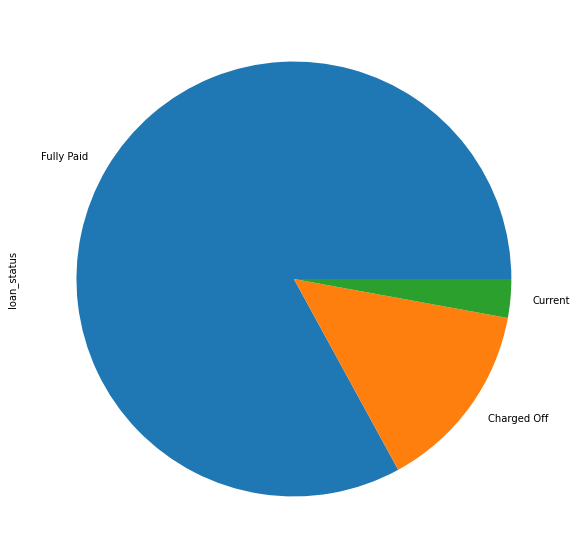

In [92]:
loan_df.loan_status.value_counts().plot.pie(figsize=(10,10))

**Insight:** Most of the loan applicants have fully paid their loan amount

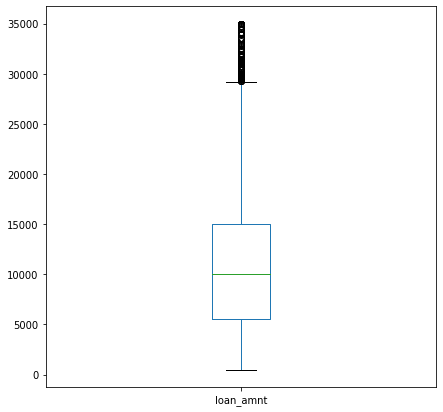

In [93]:
loan_df.loan_amnt.plot.box(figsize=(7,7))

**Insight:** Most of the loan amount is distributed between 5k to 15k

### Analysing loan interest rate

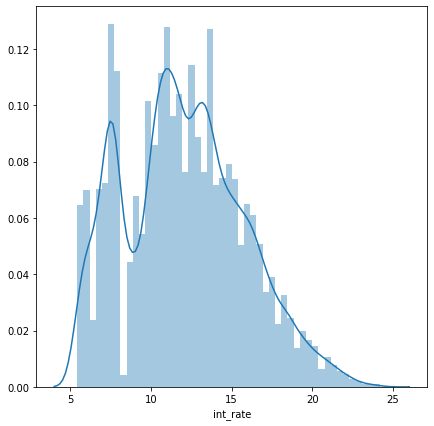

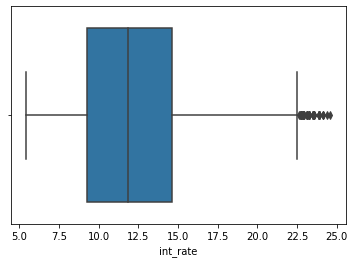

In [94]:
plt.figure(figsize=(7,7))
sns.distplot(loan_df.int_rate)
#loan_df.int_rate.plot.hist(figsize=(7,7))
plt.show()
sns.boxplot(loan_df.int_rate)
plt.show()

**Insight:** most of the interest rate is distributed approximately between 9% to 14%



### Analysing annual income of all the applicants

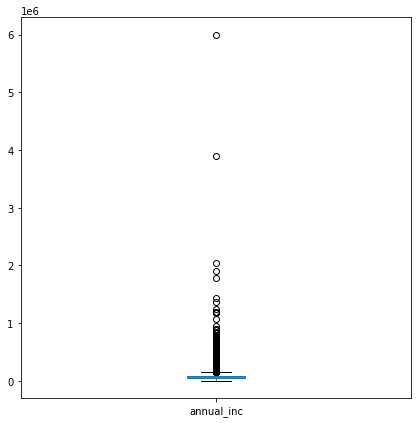

In [95]:
plt.figure(figsize=(7,7))
# g=sns.distplot(loan_df.annual_inc)
# g.set(ylabel='Annual Income    ( 1 Unit = 1M )')
# plt.show()
# s=sns.scatterplot(data=loan_df.annual_inc) 
loan_df.annual_inc.plot.box()
plt.show()

As you can see there are few outliers (above 1.8 ) .Probably removing those outliers would provide safe analysys 

In [96]:
loan_df.annual_inc.describe()

count     39717.0000
mean      68968.9264
std       63793.7658
min        4000.0000
25%       40404.0000
50%       59000.0000
75%       82300.0000
max     6000000.0000
Name: annual_inc, dtype: float64

187000.0


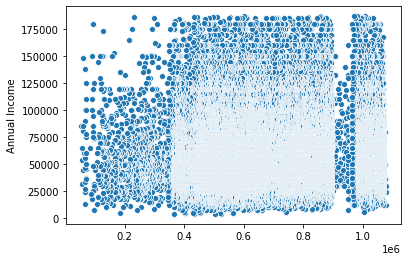

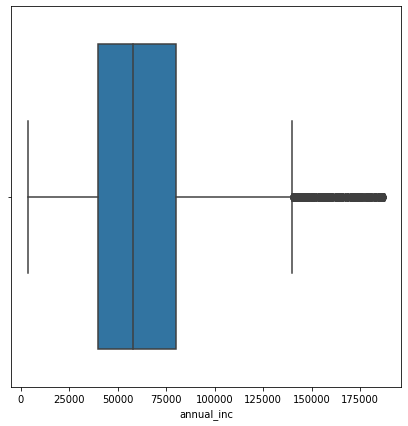

In [97]:
limit=loan_df.annual_inc.quantile(0.98)
print(limit)
loan_df=loan_df[loan_df.annual_inc<=limit]
g=sns.scatterplot(data=loan_df.annual_inc)
g.set(ylabel='Annual Income')
plt.show()
plt.figure(figsize=(7,7))
sns.boxplot(loan_df.annual_inc)
plt.show()

Now the distribution is comparitively better <br>
**Insight:** There were few outliers which are removed and most of the applicants have annual income between 40K to 80K

## Categorical Anaysis

### Analysing loan purpose

In [98]:
loan_df.purpose.value_counts()  #.plot.bar()

debt_consolidation    18356
credit_card            5041
other                  3913
home_improvement       2835
major_purchase         2143
small_business         1771
car                    1529
wedding                 929
medical                 671
moving                  573
vacation                378
house                   367
educational             319
renewable_energy         98
Name: purpose, dtype: int64

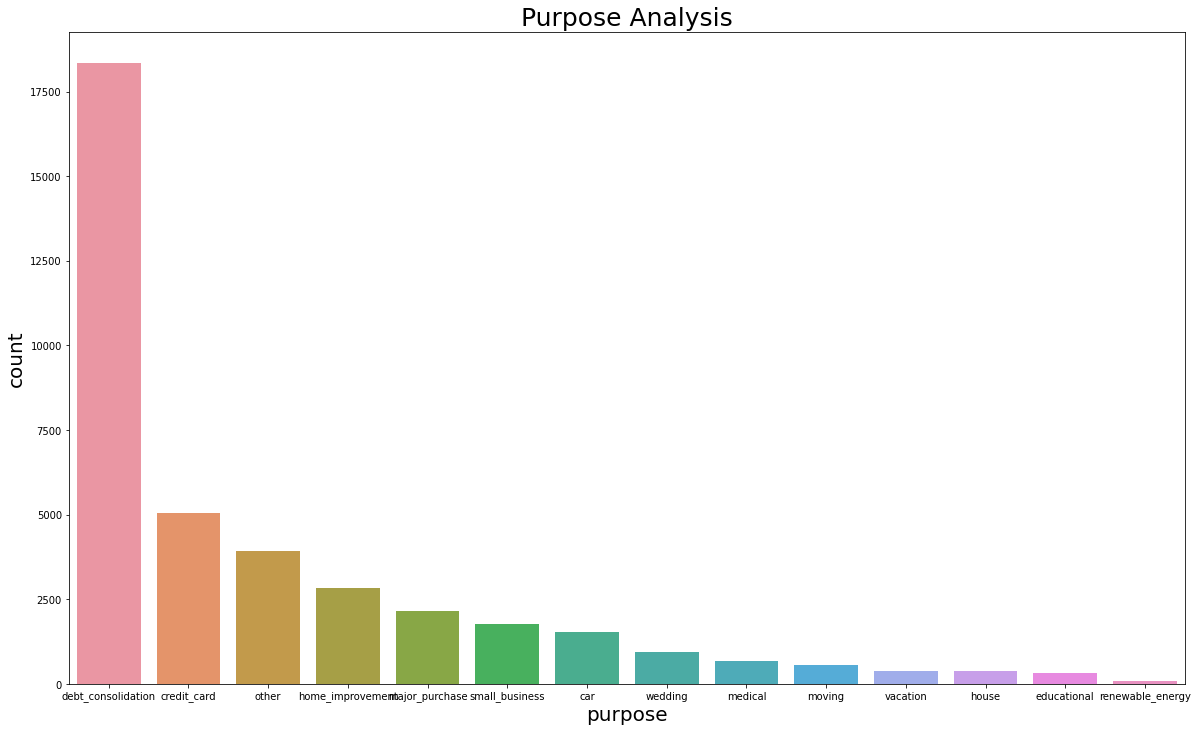

In [99]:
plt.figure(figsize=(20,12))
data=loan_df.purpose.value_counts()
g=sns.barplot(x=data.index, y=data)
g.set_title('Purpose Analysis',fontsize =25)
g.set_xlabel("purpose",fontsize=30,size=20)
g.set_ylabel("count",fontsize=20)
plt.show()

**Insight:** Most of the applicants have took loan for payng their other loans (Debt Consolidation)

### Analysing grades

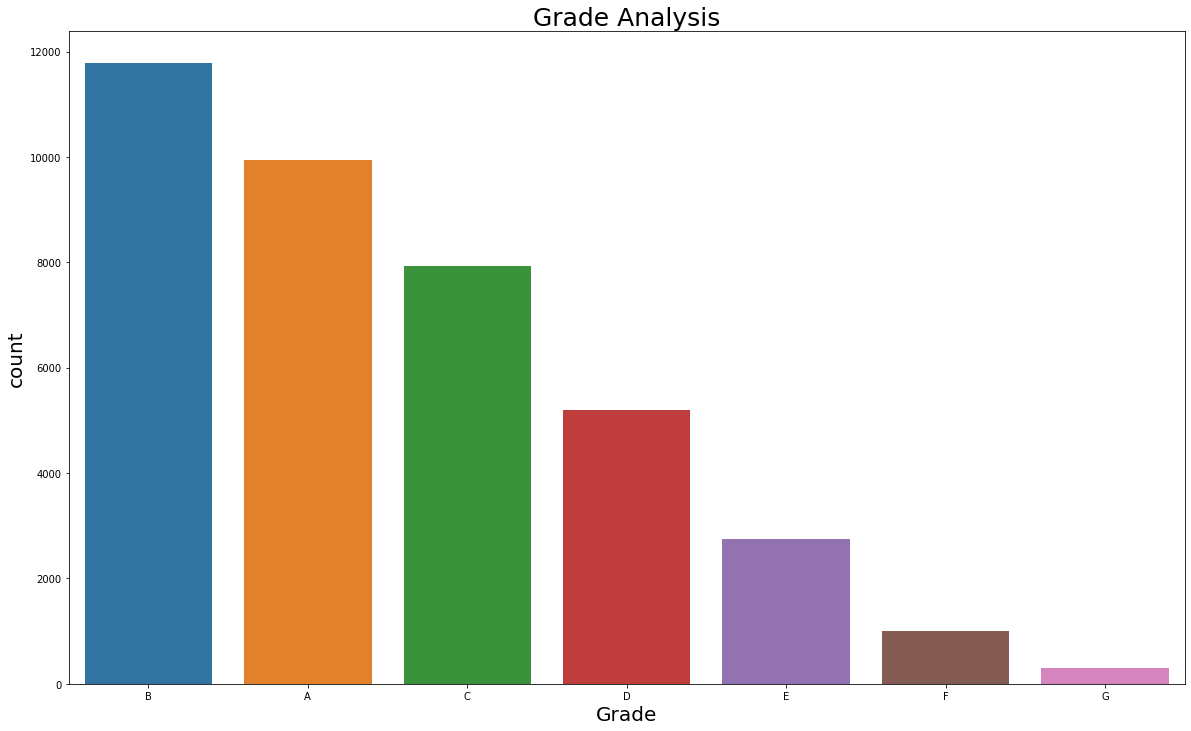

In [100]:
plt.figure(figsize=(20,12))
data=loan_df.grade.value_counts()
g=sns.barplot(x=data.index, y=data,)
g.set_title('Grade Analysis',fontsize =25)
g.set_xlabel("Grade",fontsize=30,size=20)
g.set_ylabel("count",fontsize=20)
plt.show()

**Insight:** Most of the applicants have been assigned as grade B

### Analysing loan allocation as per the employment term

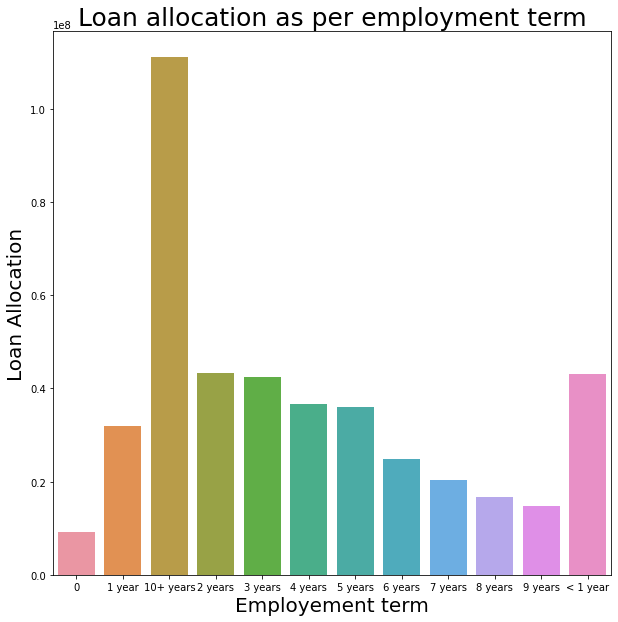

In [101]:
pv=pd.pivot_table(loan_df,values='loan_amnt',columns='emp_length',aggfunc='sum')
plt.figure(figsize=(10,10))
g=sns.barplot(data=pv)
g.set_title('Loan allocation as per employment term',fontsize =25)
g.set_xlabel("Employement term",fontsize=30,size=20)
g.set_ylabel("Loan Allocation",fontsize=20)
plt.show()

**Insight:** Most of the loan amount is allocated to applicants having 10+ years of employment term.


# Bivariate/Multivariate Analysis <a class="anchor" id="Bivariate"></a>

### Purpose of Loan vs Loan Amount by Loan Status

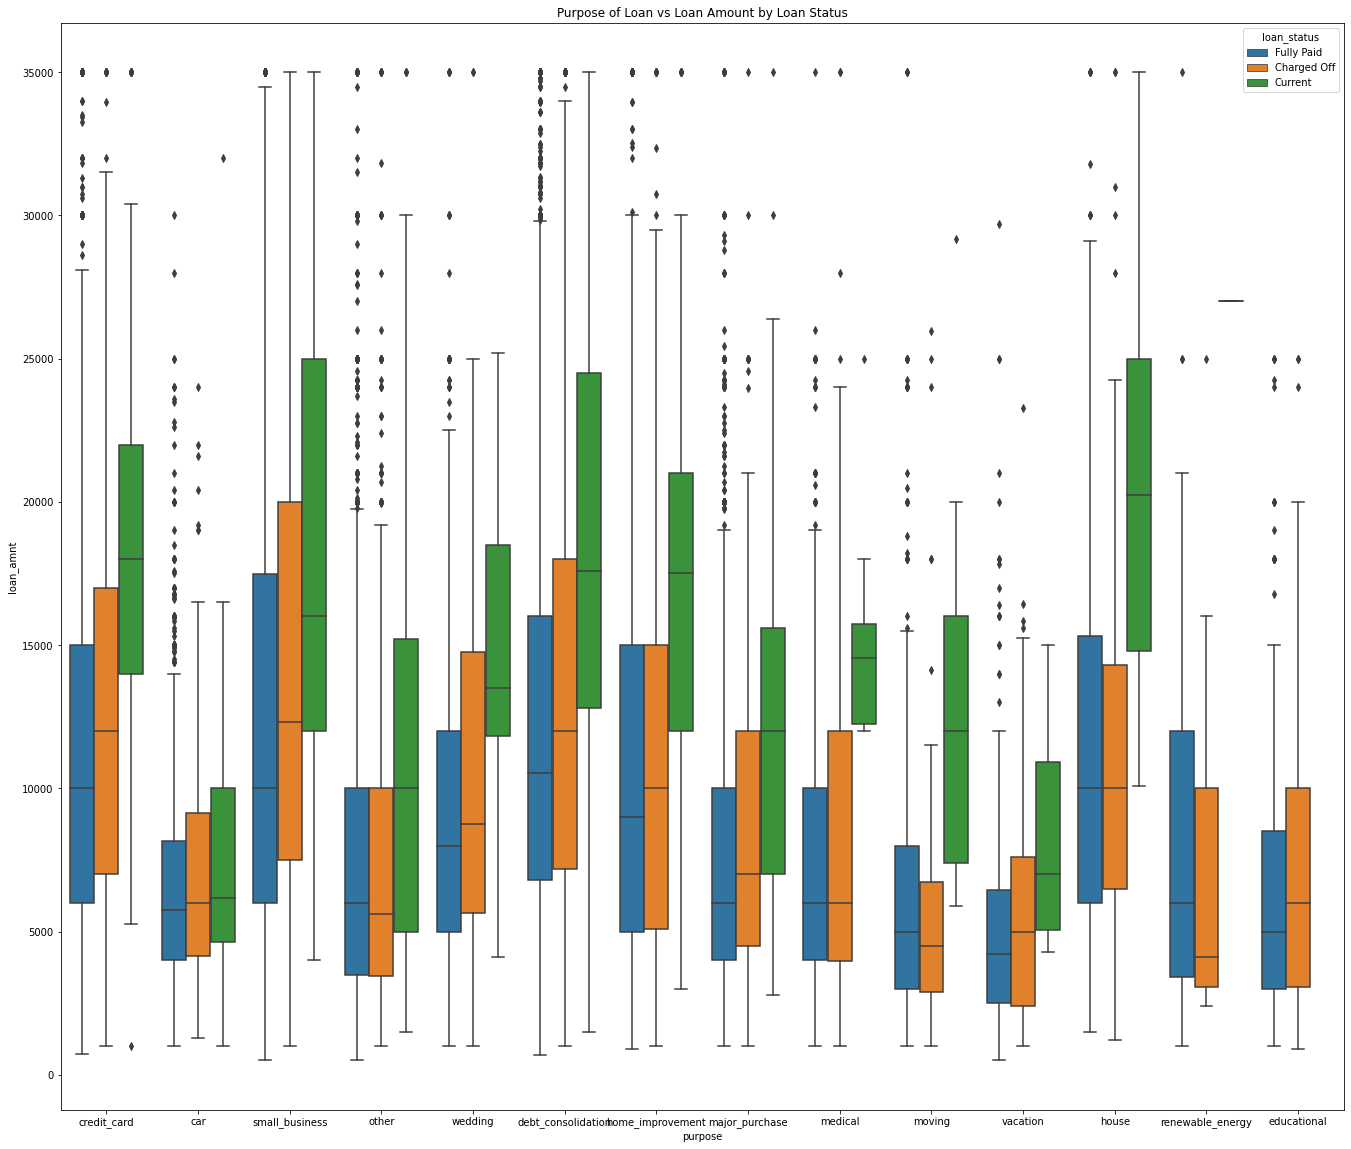

In [102]:
plt.figure(figsize=(23,20))
sns.boxplot(data =loan_df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount by Loan Status')
plt.show()

### Correlation Matrix : All Continuos(Numeric) Variables

In [103]:
# picking relevent (contineous variable) fields to check if they are corelated , 
col_for_corr = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate',
                'installment','annual_inc', 'dti', 'out_prncp', 'out_prncp_inv',
                'loan_amt_inc_ratio']
loan_correlation = loan_df.filter(col_for_corr).corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,out_prncp,out_prncp_inv
loan_amnt,1.0000,0.9816,0.9397,0.3041,0.9297,0.4160,0.0812,0.1970,0.1967
funded_amnt,0.9816,1.0000,0.9580,0.3081,0.9556,0.4113,0.0810,0.1991,0.1988
funded_amnt_inv,0.9397,0.9580,1.0000,0.3024,0.9037,0.3946,0.0891,0.2078,0.2078
int_rate,0.3041,0.3081,0.3024,1.0000,0.2787,0.0697,0.1138,0.1339,0.1340
installment,0.9297,0.9556,0.9037,0.2787,1.0000,0.4124,0.0695,0.1283,0.1282
annual_inc,0.4160,0.4113,0.3946,0.0697,0.4124,1.0000,-0.0974,0.0668,0.0666
dti,0.0812,0.0810,0.0891,0.1138,0.0695,-0.0974,1.0000,0.0375,0.0374
out_prncp,0.1970,0.1991,0.2078,0.1339,0.1283,0.0668,0.0375,1.0000,0.9998
out_prncp_inv,0.1967,0.1988,0.2078,0.1340,0.1282,0.0666,0.0374,0.9998,1.0000


### Heatmap of the correlation matrix

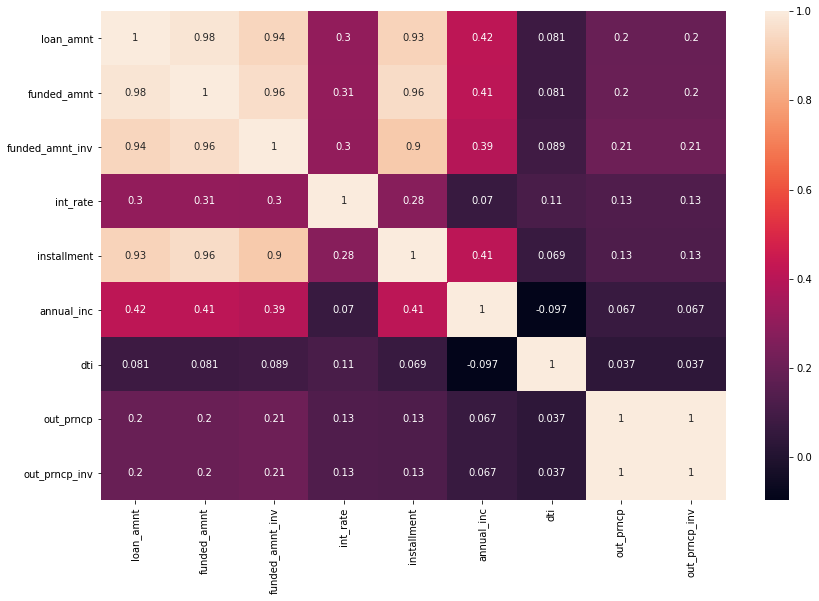

In [104]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

**Insight:** 

> From the heat map it is very clear that **annual income and Debt to Income (dti) is negatively corelated**. It makes sense becuase more income means less debt ration

> It is also clear that **annual income and loan amount is positively corelated**. Becuase the more income an applicant has the more there is chance to pay off the loan.

> One more factor to consider is **Intrest rate and loan amount is positively corelated**. The more the amount of the loan is the greater the interest would be.


### Employment Length vs Loan Amount for different pupose of Loan

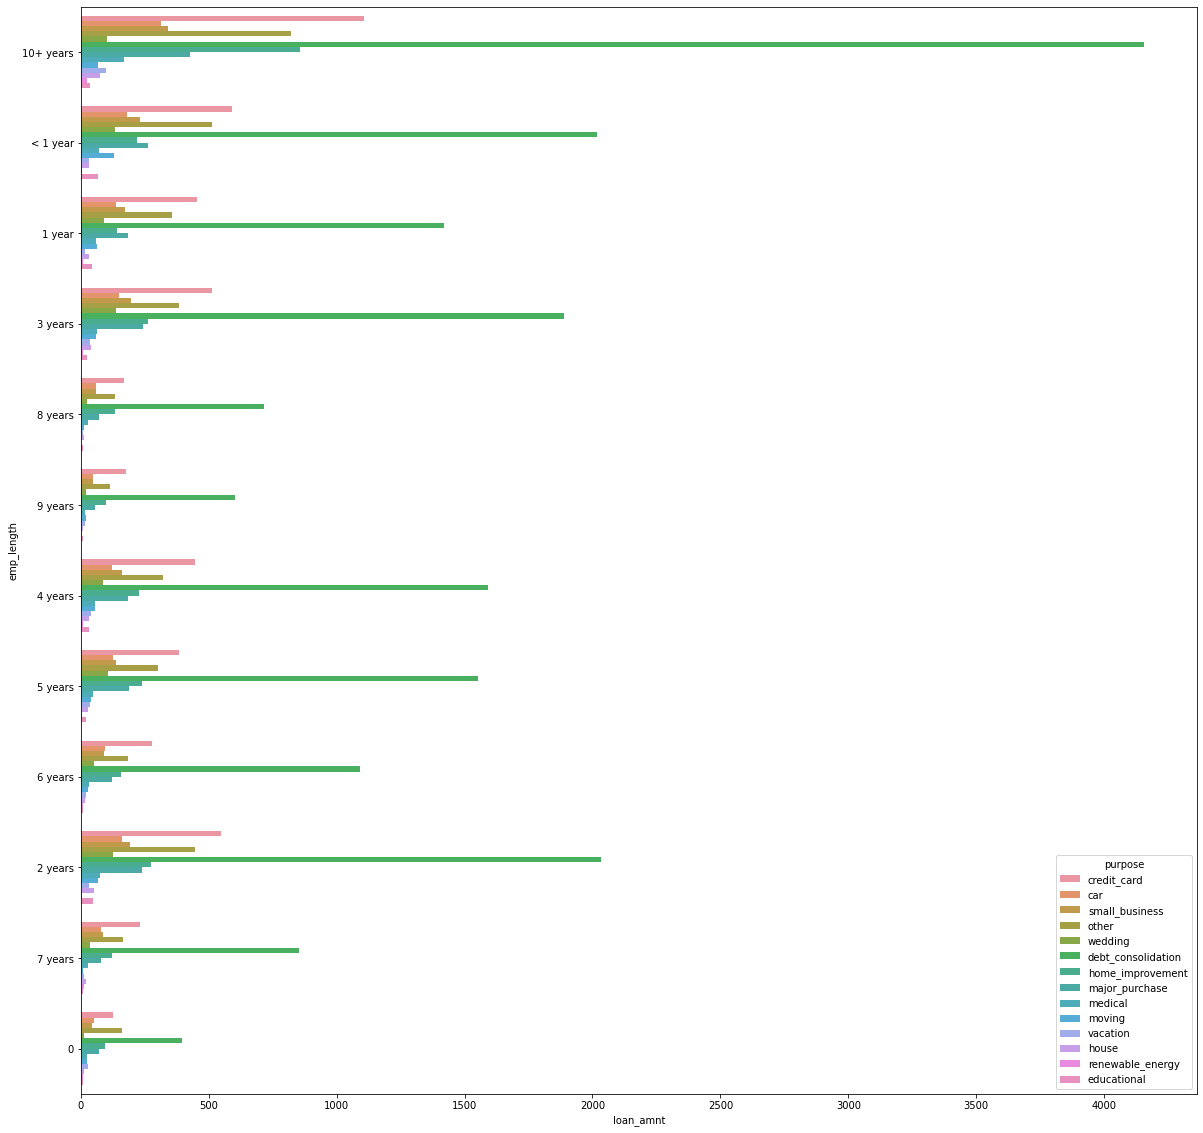

In [105]:
# As there are few unrecognized categories such as other and none, we shall remove it.

loan_df=loan_df[~loan_df.home_ownership.isin(['OTHER','NONE'])]
plt.figure(figsize=(20,20))
# as there is no estimator for count, using a lambda expression to achive this
sns.barplot(y='emp_length', x='loan_amnt',hue="purpose", data=loan_df,estimator=lambda x: len(x) )
plt.show()

# Analysing driver variables for loan defaulters <a class="anchor" id="drivervariables"></a>

**Charge off**
> By defination it means the business that gave you the loan, typically a Credit card company or retailer, has written off the amount owed as uncollectable, closed your account, and declared it a loss. 
<br>
so basically Charged off applicants are the loan defaulters

> To get the probability of getting a charged off applicant we can use a simple formula as below

`Probability of Charged Off= No. of applicants who is charged off / total no. of applicants `




In [106]:
# Defining a function to provide us summary matrix with given column as parameter
def summarytab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    summarytab = pd.crosstab(df[col], df['loan_status'],margins=True)
    summarytab['Probability_Charged Off'] = round((summarytab['Charged Off']/summarytab['All']),3)
    summarytab = summarytab[0:-1]
    return summarytab

In [107]:
# Line bar chart for Probability of charge off
def prob_chart(df,col,stacked= True,showtable=False):
    # get dataframe from summarytab function
    plotCrosstab = summarytab(df,col)
    
    if showtable:
      display(plotCrosstab)

    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(15,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)  
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [108]:
# Get slots arranged
def slots(df,col):
  labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
  qnty=list(round(df[col].quantile([0,0.2,0.4,0.6,0.8,1])))
  for x in range(len(labels)):
    labels[x]=labels[x]+" "+"(.aprx "+str(qnty[x])+")"
  return labels;

### understanding the impact of Grades on loan defualter

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,598,40,9282,9920,0.0600
B,1399,341,10020,11760,0.1190
C,1336,261,6324,7921,0.1690
D,1100,216,3861,5177,0.2120
E,695,173,1877,2745,0.2530
F,307,69,626,1002,0.3060
G,97,16,187,300,0.3230


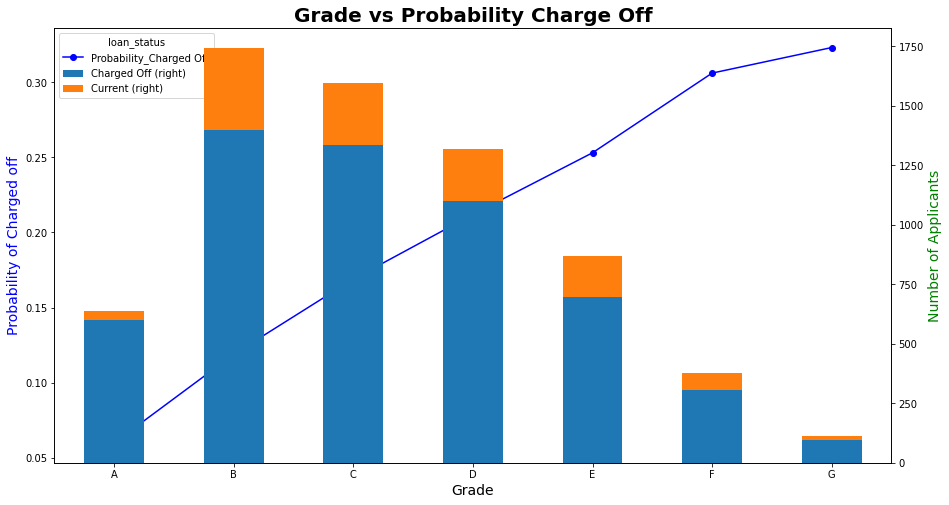

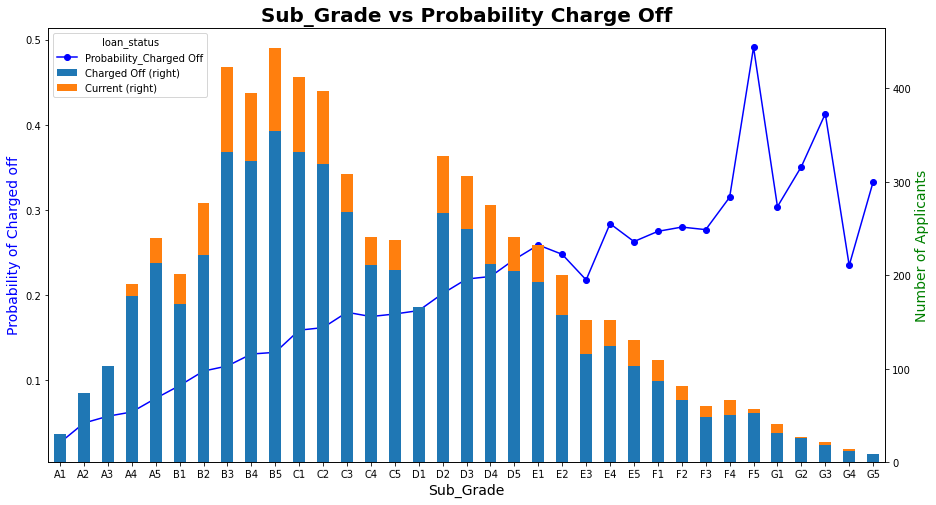

In [109]:
prob_chart(loan_df,"grade",showtable=True)
prob_chart(loan_df,"sub_grade")

**Insight:**
> Grade A to G, probability that person will be Defaulter, is increasing

### understanding the impact of Annual Income on loan defualter

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_level,,,,,
Very Low (.aprx 4000.0),1408,135,6269,7812,0.1800
Low (.aprx 37000.0),1198,220,6474,7892,0.1520
Medium (.aprx 50000.0),1152,234,6530,7916,0.1460
High (.aprx 65000.0),937,246,6257,7440,0.1260
Very High (.aprx 87613.0),837,281,6647,7765,0.1080


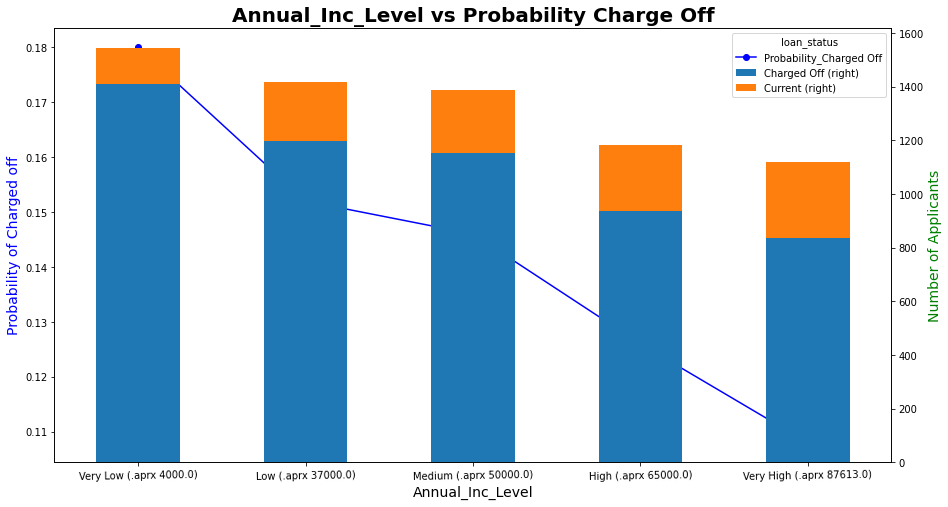

In [110]:
loan_df['annual_inc_level'] = pd.qcut(loan_df['annual_inc'],q=5, labels=slots(loan_df,'annual_inc'))
prob_chart(loan_df,"annual_inc_level",showtable=True)

**Insight:**
> Annual income is one of the important factor to consider if a loan applicant will default or not <br>
Higher the income the lower is the prbability of getting charged off

### understanding the impact of Interest rate on loan defualter

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_level,,,,,
Very Low (.aprx 5.0),426,15,7475,7916,0.0540
Low (.aprx 8.0),841,159,7292,8292,0.1010
Medium (.aprx 11.0),1027,209,5926,7162,0.1430
High (.aprx 13.0),1316,230,6161,7707,0.1710
Very High (.aprx 15.0),1922,503,5323,7748,0.2480


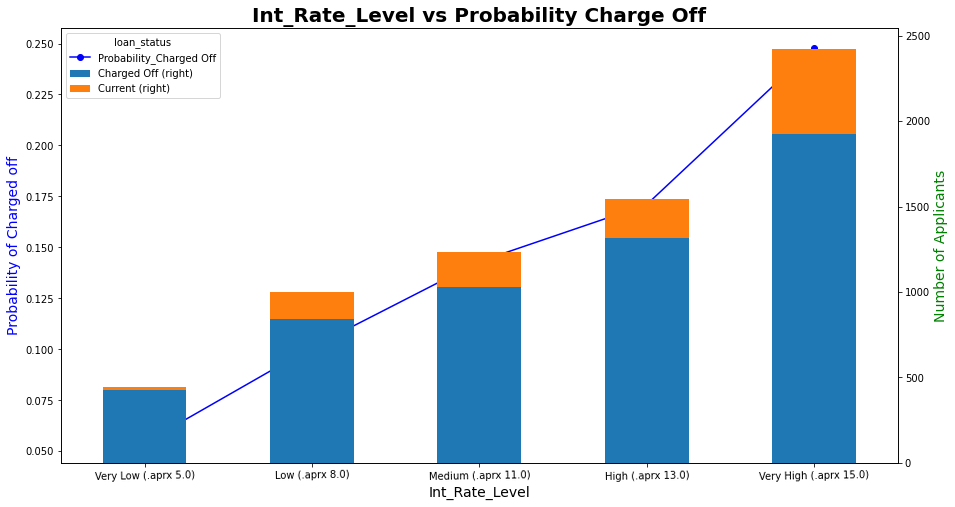

In [111]:
loan_df['int_rate_level'] = pd.qcut(loan_df['int_rate'],q=5, labels=slots(loan_df,'int_rate'))
prob_chart(loan_df,"int_rate_level",showtable=True)

**Insight:**
> The heigher the interest rate is the more there is a chance that an applicant will default the loan. The probability of defaulting loan is heighest at 15% interest

### understanding the impact of Loan Amount on defualter

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
loan_amnt_level,,,,,
Very Low (.aprx 500.0),1308,96,8079,9483,0.1380
Low (.aprx 5000.0),746,86,5278,6110,0.1220
Medium (.aprx 7800.0),1007,86,6610,7703,0.1310
High (.aprx 11300.0),1103,339,6429,7871,0.1400
Very High (.aprx 16000.0),1368,509,5781,7658,0.1790


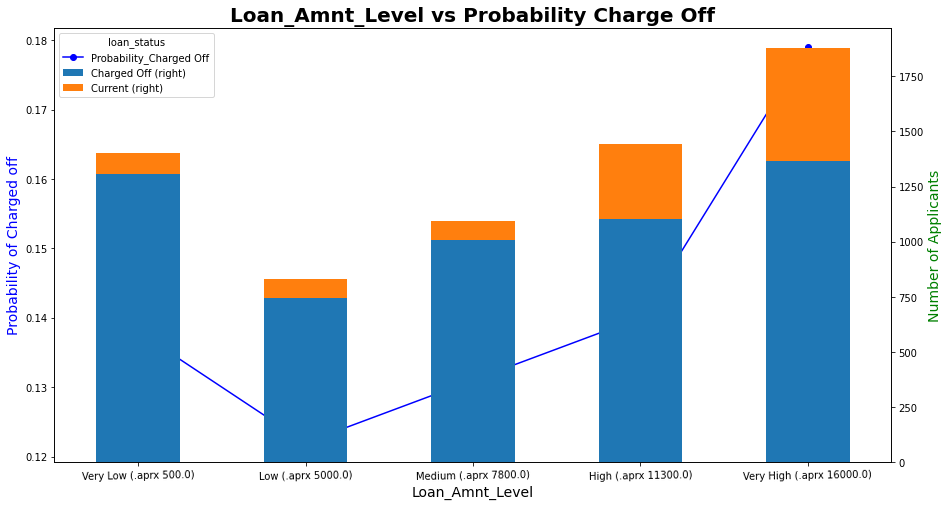

In [112]:
loan_df['loan_amnt_level'] = pd.qcut(loan_df['loan_amnt'],q=5, labels=slots(loan_df,'loan_amnt'))
prob_chart(loan_df,"loan_amnt_level",showtable=True)

**Insight:**
> As the loan amount is increasing the probability of getting charged off is also increasing.

### understanding the impact of region/state on  being a loan defualter

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
AK,14,2,62,78,0.1790
AL,54,17,378,449,0.1200
AR,25,10,203,238,0.1050
AZ,118,29,709,856,0.1380
CA,1104,149,5682,6935,0.1590
CO,95,26,652,773,0.1230
CT,94,24,602,720,0.1310
DC,15,3,190,208,0.0720
DE,12,1,99,112,0.1070


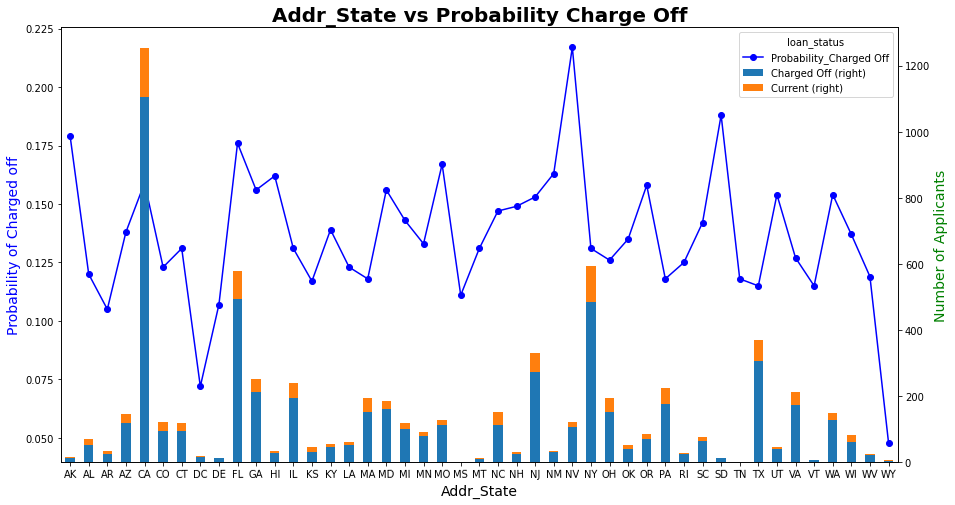

In [113]:
# Removing  Address state those having vary small value, which will impact the Probability Analysis

filter_states = loan_df.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan_df.drop(labels = loan_df[loan_df.addr_state.isin(filter_states.index)].index)
prob_chart(loan_filter_states,"addr_state",True,True)

**Insight:**
> Although the chart show that there are few states like 'NV' where there the probability of being charged off is high but there is no trend in it. <br> There are many states which perform similar in terms of loan defaulter for example 'CO','IL','KS','MA' & MS dont have significant changes in the charged off probability hence the variable state can't be cosidered as a very crucial factor to determine is an applicant will default the loan or not.

### understanding the impact of DTI (Debt to Income) on Loan defualter

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
dti_level,,,,,
Very Low (.aprx 0.0),946,156,6666,7768,0.1220
Low (.aprx 7.0),997,216,6549,7762,0.1280
Medium (.aprx 12.0),1137,208,6428,7773,0.1460
High (.aprx 15.0),1196,234,6333,7763,0.1540
Very High (.aprx 20.0),1256,302,6201,7759,0.1620


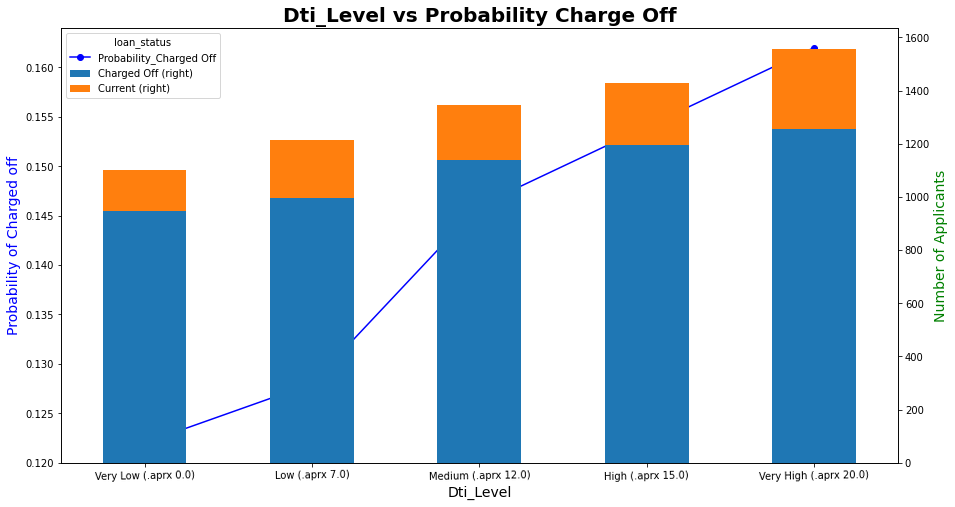

In [114]:
loan_df['dti_level'] = pd.qcut(loan_df['dti'],q=5, labels=slots(loan_df,'dti'))
prob_chart(loan_df,"dti_level",showtable=True)

**Insight:**
> The heigher the DTI ratio, the more there is a chance that an applicant will default the loan. 

# Conclusion

We have performed different types of analysis to find few of the important factors/variables that needs to be considered to determine is an applicant will default or not. Those variables are as follows:-


1.   Grades (grade)
> From A to G including the subgrades the trend is the probability of being a loan default increases.
2.   Annual Income (annual_inc) 
> It has a negative co-relation, the more the income, the lesser chance to default the 
3.   Inerest Rate (int_rate)
> It is positively co-related, the more the interest rate the more chance of an applicante to be a loan defaulter
4.   Loan Ammount (loan_amnt)
> It is positively co-related, the more the loan amount, the more there is a chance of an applicant to be a loan defaulter
5.   Debt To Income ratio (dti)
> It is positively co-related, the more the DTI, the more there is a chance of an applicant to be a loan defaulter




